In [1]:
# This block allows for connection to the Yelp Database and Importation of Libaries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import t

host_name = 'database-1-yelp-data.c4d8re67ta4m.us-east-2.rds.amazonaws.com'
database_name = 'yelp_project'
cnx = mysql.connector.connect(user='admin123', host = host_name, database = database_name, port = '3306', password = 'DB_project')
cursor = cnx.cursor()

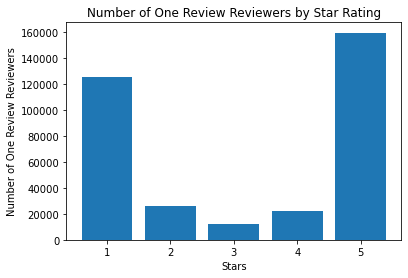

In [2]:
# Query 1: Number of One-Review Reviewers Separated by Star Ratings
# ------------------------------------------------------------------
# Accomplished by joining the review and user tables to find users 
# with one review. Then, calculated a "true" star rating and pull
# the count of each star (should be whole number since we are only
# pulling from one-review reviewers). Then plot in a bar chart.

query1 = ("""select count(zone2.u) Number_of_Reviews, zone2.true_stars Stars from
(select zone1.u, zone1.review_count, round(sum(zone1.stars)/count(zone1.stars), 6) true_stars, zone1.review_count rc from 
(select review.user_id r, review.stars, user.user_id u, user.review_count from review
inner join user
on review.user_id = user.user_id
having user.review_count = 1) as zone1
group by zone1.u) as zone2
group by Stars
having Stars = 1 or Stars = 2 or Stars = 3 or Stars = 4 or Stars = 5
order by Stars desc""")

cursor.execute(query1)

user1 = cursor.fetchall()
df1 = pd.DataFrame.from_dict(user1)
df1 = df1.rename({0: 'Number_of_Reviews', 1: 'Stars'}, axis=1)
plt.bar(x=df1['Stars'], height=df1['Number_of_Reviews'])
plt.xlabel("Stars")
plt.ylabel("Number of One Review Reviewers")
plt.title("Number of One Review Reviewers by Star Rating")
plt.show()

In [4]:
# Query 2: Find the Overall Average Stars
# ----------------------------------------
# This is accomplished by calculating the
# "true stars" from the review table

query2 = ("""select round(sum(review.stars)/count(review.stars), 6) as true_stars from review""")

cursor.execute(query2)

user2 = cursor.fetchall()
df2 = pd.DataFrame.from_dict(user2)
df2 = df2.rename({0: 'Overall Average Stars'}, axis=1)
df2

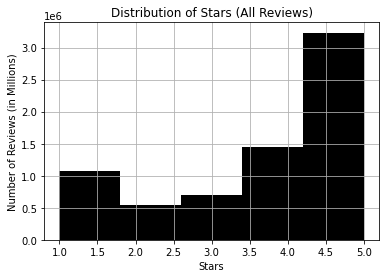

In [6]:
# Query 2b: Distribution of Stars (All Reviews)
# ---------------------------------------------
# This is accomplished by looking at all of 
# the stars listed in the review table. Then,
# plot the results in a histogram.

query2b = ("""select stars from review""")

cursor.execute(query2b)

user2b = cursor.fetchall()
df2b = pd.DataFrame.from_dict(user2b)
df2b = df2b.rename({0: 'Stars'}, axis=1)
df2b['Stars'].hist(bins=5, color='black')
plt.xlabel("Stars", color="black")
plt.ylabel("Number of Reviews (in Millions)", color='black')
plt.title("Distribution of Stars (All Reviews)", color='black')
plt.show()


In Query 3 and beyond, "zone" verbage is used to help see nests clearly within the SQL script.

In [8]:
# Query 3: Find the Average Business Star Average
# -----------------------------------------------
# This is accomplished by joining the business
# and review tables on business_id and finding
# the "true" star rating for each business. Then,
# calculate the average of all of those values.

query3 = ("""select avg(zone.true_stars) from 
(select business.business_id b, 
round(sum(review.stars)/count(review.stars), 6) true_stars from review
inner join business
on review.business_id = business.business_id
group by b) as zone""")

cursor.execute(query3)

user3 = cursor.fetchall()
df3 = pd.DataFrame.from_dict(user3)
df3 = df3.rename({0: 'Average of Average Business Stars'}, axis=1)
df3

,Average of Average Business Stars
0,3.58753430


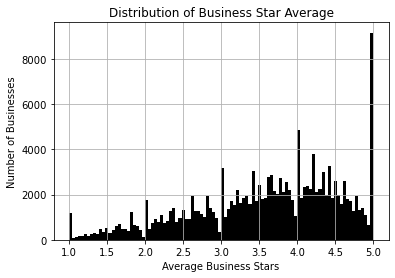

In [8]:
# Query 3b: Distribution of Business Star Average
# ------------------------------------------------
# This is accomplished by joining the business
# and review tables on business_id and finding
# the "true" star rating for each business. Then,
# plotting those values in a histogram.

query3b = ("""select zone.true_stars from 
(select business.business_id b, 
round(sum(review.stars)/count(review.stars), 6) true_stars from review
inner join business
on review.business_id = business.business_id
group by b) as zone""")

cursor.execute(query3b)

user3b = cursor.fetchall()
df3b = pd.DataFrame.from_dict(user3b)
df3b = df3b.rename({0: 'Average Business Stars'}, axis=1)
df3b['Average Business Stars'].hist(bins=100, color='black')
plt.xlabel("Average Business Stars", color="black")
plt.ylabel("Number of Businesses", color='black')
plt.title("Distribution of Business Star Average", color='black')
plt.show()


In [2]:
# Query 4: Find the Average Stars without One-Review Reviewers
# -------------------------------------------------------------
# This is accomplished by getting the count of reviews by user
# in the review table and only keeping users with the count
# greater than one. Then the review table is rejoined to
# this subset on the user ID to allow for the calculation of 
# "true" stars.

query4 = ("""select round(sum(zone2.stars)/count(zone2.stars), 6) from (select * from review
inner join
(select count(review_id) review_count, user_id z from review
group by user_id
having review_count > 1) as zone1
on review.user_id=zone1.z
order by zone1.review_count asc, zone1.z asc) as zone2""")

cursor.execute(query4)

user4 = cursor.fetchall()
df4 = pd.DataFrame.from_dict(user4)
df4 = df4.rename({0: 'Overall Average Stars (w/o One-Review Reviewers)'}, axis=1)
df4

,Overall Average Stars (w/o One-Review Reviewers)
0,3.7944


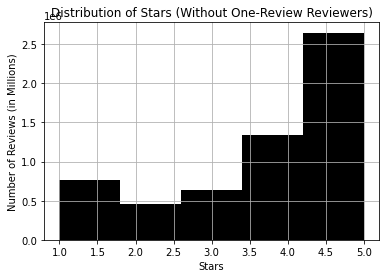

In [10]:
# Query 4b: Distribution of Overall Star Average without One-Review Reviewers
# -----------------------------------------------------------------------------
# This is accomplished by getting the count of reviews by user in the review 
# table and only keeping users with the count greater than one. Then the review 
# table is rejoined to this subset on the user ID to allow for the distribution 
# of "true" stars in a histogram to be plotted.

query4b = ("""select zone2.stars from (select * from review
inner join
(select count(review_id) review_count, user_id z from review
group by user_id
having review_count > 1) as zone1
on review.user_id=zone1.z
order by zone1.review_count asc, zone1.z asc) as zone2""")

cursor.execute(query4b)

user4b = cursor.fetchall()
df4b = pd.DataFrame.from_dict(user4b)
df4b = df4b.rename({0: 'Overall Average Stars (w/o One-Review Reviewers)'}, axis=1)
df4b['Overall Average Stars (w/o One-Review Reviewers)'].hist(bins=5, color='black')
plt.xlabel("Stars", color="black")
plt.ylabel("Number of Reviews (in Millions)", color='black')
plt.title("Distribution of Stars (Without One-Review Reviewers)", color='black')
plt.show()

In [3]:
# Query 5: Find the Average Business Star Average without One-Review Reviewers
# -----------------------------------------------------------------------------
# This is accomplished by getting the count of reviews by user in the review 
# table and only keeping users with the count greater than one. Then the review 
# table is rejoined to this subset. Then the average business "true" star rating
# is calculated. Then the average of all of the businesses's average is
# calculated as well.

query5 = ("""select avg(zone3.bus_avg) avg_bus_avg_star from 
(select round(sum(zone2.stars)/count(zone2.stars), 6) bus_avg, zone2.business_id from (select * from review
inner join
(select count(review_id) review_count, user_id z from review
group by user_id
having review_count > 1) as zone1
on review.user_id=zone1.z
order by zone1.review_count asc, zone1.z asc) as zone2
group by zone2.business_id) as zone3""")

cursor.execute(query5)

user5 = cursor.fetchall()
df5 = pd.DataFrame.from_dict(user5)
df5 = df5.rename({0: 'Average of Average Business Stars (w/o One-Review Reviewers)'}, axis=1)
df5

,Average of Average Business Stars (w/o One-Review Reviewers)
0,3.62786420


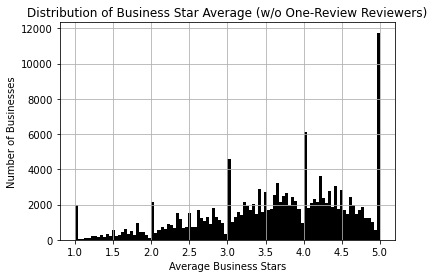

In [11]:
# Query 5b: Plot the Average Business Star Average without One-Review Reviewers
# ------------------------------------------------------------------------------
# This is accomplished by getting the count of reviews by user in the review 
# table and only keeping users with the count greater than one. Then the review 
# table is rejoined to this subset. Then the average business "true" star rating
# is calculated. Then these values are plotted in a histogram.

query5b = ("""select zone3.bus_avg from (select round(sum(zone2.stars)/count(zone2.stars), 6) bus_avg, zone2.business_id from (select * from review
inner join
(select count(review_id) review_count, user_id z from review
group by user_id
having review_count > 1) as zone1
on review.user_id=zone1.z
order by zone1.review_count asc, zone1.z asc) as zone2
group by zone2.business_id) as zone3""")

cursor.execute(query5b)

user5b = cursor.fetchall()
df5b = pd.DataFrame.from_dict(user5b)
df5b = df5b.rename({0: 'Average of Average Business Stars (w/o One-Review Reviewers)'}, axis=1)
df5b['Average of Average Business Stars (w/o One-Review Reviewers)'].hist(bins=100, color='black')
plt.xlabel("Average Business Stars", color="black")
plt.ylabel("Number of Businesses", color='black')
plt.title("Distribution of Business Star Average (w/o One-Review Reviewers)", color='black')
plt.show()

Query 6-6e leverages Queries 3-5 to look at restaurants in Nashville. The condition where restaurant = 1 and city = Nashville
in the business table is used to recreate this specific case.

Average Star Rating for All Nashville Restaurants: 3.816998188846732049538263297


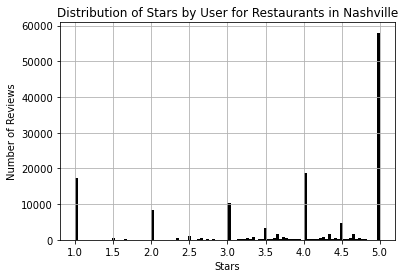

In [4]:
query6 = ("""select zone1.user_id1 user_id2, round(sum(zone1.stars)/count(zone1.stars), 6) true_stars, count(zone1.restaurant) review__count from 
(select review.user_id user_id1, review.business_id bus_id, review.stars, business.city, business.restaurant from review
inner join business
on review.business_id=business.business_id
where city = 'Nashville'
having restaurant = 1) as zone1
group by zone1.user_id1""")

cursor.execute(query6)

user6 = cursor.fetchall()
df6 = pd.DataFrame.from_dict(user6)
df6 = df6.rename({0: 'User_ID', 1: 'Stars', 2: 'Review_Count'}, axis=1)
print("Average Star Rating for All Nashville Restaurants: {}".format(sum(df6['Stars'])/len(df6['Stars'])))
df6['Stars'].hist(bins=100, color='black')
plt.xlabel("Stars", color="black")
plt.ylabel("Number of Reviews", color='black')
plt.title("Distribution of Stars for Restaurants in Nashville", color='black')
plt.show()

Average Star Rating for All Nashville Restaurants Reviews: 3.902349581721587


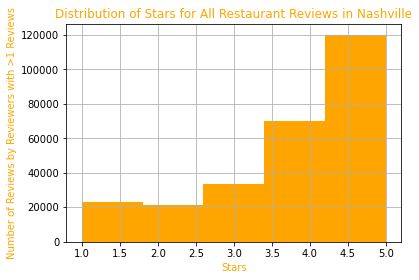

In [11]:
query6b = ("""select zone3.real_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id
having review_count > 1) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business
where city = 'Nashville'
having restaurant = 1) as zone3""")

cursor.execute(query6b)

user6b = cursor.fetchall()
df6b = pd.DataFrame.from_dict(user6b)
df6b = df6b.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
print("Average Star Rating for All Nashville Restaurants Reviews: {}".format(sum(df6b['Stars'])/len(df6b['Stars'])))
df6b['Stars'].hist(bins=5, color='orange')
plt.xlabel("Stars", color="orange")
plt.ylabel("Number of Reviews by Reviewers with >1 Reviews", color='orange')
plt.title("Distribution of Stars for All Restaurant Reviews in Nashville", color='orange')
plt.show()

Average Star Rating for All Nashville Restaurant Reviews: 3.8660903679736736


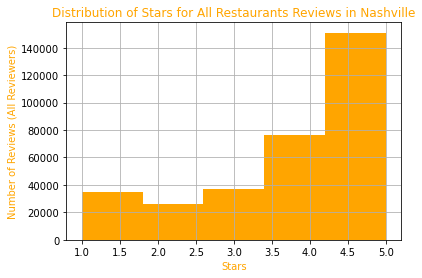

In [12]:
query6c = ("""select zone3.real_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business
where city = 'Nashville'
having restaurant = 1) as zone3""")

cursor.execute(query6c)

user6c = cursor.fetchall()
df6c = pd.DataFrame.from_dict(user6c)
df6c = df6c.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
print("Average Star Rating for All Nashville Restaurant Reviews: {}".format(sum(df6c['Stars'])/len(df6c['Stars'])))
df6c['Stars'].hist(bins=5, color='orange')
plt.xlabel("Stars", color="orange")
plt.ylabel("Number of Reviews (All Reviewers)", color='orange')
plt.title("Distribution of Stars for All Restaurants Reviews in Nashville", color='orange')
plt.show()

Average Star Rating for All Nashville Restaurants: 3.603623442492012779552715655


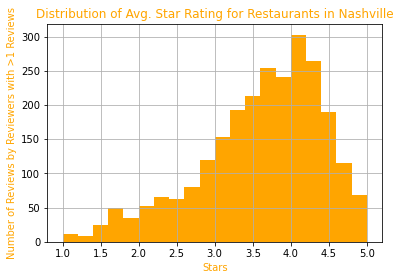

In [3]:
query6d = ("""select round(sum(zone3.real_stars)/count(zone3.real_stars), 6) true_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id
having review_count > 1) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business
where city = 'Nashville'
having restaurant = 1) as zone3
group by business_id""")

cursor.execute(query6d)

user6d = cursor.fetchall()
df6d = pd.DataFrame.from_dict(user6d)
df6d = df6d.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
print("Average Star Rating for All Nashville Restaurants: {}".format(sum(df6d['Stars'])/len(df6d['Stars'])))
df6d['Stars'].hist(bins=20, color='orange')
plt.xlabel("Stars", color="orange")
plt.ylabel("Number of Reviews by Reviewers with >1 Reviews", color='orange')
plt.title("Distribution of Avg. Star Rating for Restaurants in Nashville", color='orange')
plt.show()

Average Star Rating for All Nashville Restaurants: 3.565626118210862619808306709


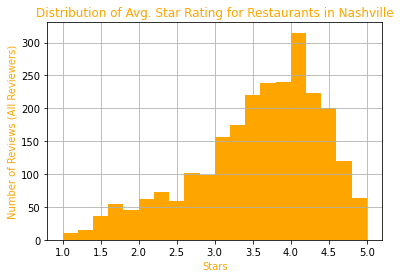

In [4]:
query6e = ("""select round(sum(zone3.real_stars)/count(zone3.real_stars), 6) true_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business
where city = 'Nashville'
having restaurant = 1) as zone3
group by business_id""")

cursor.execute(query6e)

user6e = cursor.fetchall()
df6e = pd.DataFrame.from_dict(user6e)
df6e = df6e.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
print("Average Star Rating for All Nashville Restaurants: {}".format(sum(df6e['Stars'])/len(df6e['Stars'])))
df6e['Stars'].hist(bins=20, color='orange')
plt.xlabel("Stars", color="orange")
plt.ylabel("Number of Reviews (All Reviewers)", color='orange')
plt.title("Distribution of Avg. Star Rating for Restaurants in Nashville", color='orange')
plt.show()

In [7]:
# These two tables are merged together in the hopes to
# find any restaurants in Nashville that have indications
# of change in "true" star rating before and after the
# one-review reviewers are omitted. The top 25 and bottom 
# 25 difference values are seen in the next two blocks.

df6f = df6d.merge(df6e, how='inner', on='Business_ID')
df6f['Stars Difference']=df6f['Stars_x']-df6f['Stars_y']
df6f=df6f.sort_values(by=['Stars Difference'],ascending=False)
df6f.head(25)



,Stars_x,Business_ID,Business_Name_x,Stars_y,Business_Name_y,Stars Difference
1622,5.0000,oVygpPlGIKyPltoOjusqtw,Pupuseria Santa Rosa,3.6667,Pupuseria Santa Rosa,1.3333
2163,3.6667,vQzYGIeT53iQnUJi0H4amw,Jerry's Market,2.6000,Jerry's Market,1.0667
2322,4.4444,XKj07H-SUl1_fuvAv3ncHQ,Alexandria Pizza Kebab and Gyro,3.3846,Alexandria Pizza Kebab and Gyro,1.0598
2200,5.0000,w0Y0bgERBoo8-zWmudS_Hw,Chopper's Grill,4.0000,Chopper's Grill,1.0000
230,3.7500,3NogWpnW5gjivjEZ-wL9Wg,Arby's,2.8333,Arby's,0.9167
1743,3.6667,qmBYuem4NQv-5zWiVI3YLg,Subway,2.8000,Subway,0.8667
833,4.5000,eBcOmqHyd0kSzZCg0z-HVA,La San Marqueña Restaurant,3.6667,La San Marqueña Restaurant,0.8333
1656,2.5000,PJFhkLN8Bt6K0nAXESe2bw,Till Five Pizza,1.6875,Till Five Pizza,0.8125
2289,3.3571,xB2NmS0JG1Vgy7dK2ftcwQ,Taco Bell Cantina,2.5769,Taco Bell Cantina,0.7802
595,3.1250,Bcb36UXi2iy2s0xY1kkFzw,Frisky Frog's,2.3514,Frisky Frog's,0.7736


In [8]:
df6f.tail(25)

,Stars_x,Business_ID,Business_Name_x,Stars_y,Business_Name_y,Stars Difference
1482,2.2857,mVsfGBtzgXhlfdpRv2FVvw,Jerusalem,2.6250,Jerusalem,-0.3393
521,3.8571,acxFUAHX_t1ESgo_42b4fw,Big Daddy's Bar-B-Que,4.2000,Big Daddy's Bar-B-Que,-0.3429
1935,3.2500,tACGRiKglIXVjUpVsYODfg,Music City Hotdogs,3.6000,Music City Hotdogs,-0.3500
2013,3.2500,u0qwhRmDIO90BfLbR1Bd9g,Players Inn,3.6000,Players Inn,-0.3500
1277,3.1429,jZ_tVIYc47iXuZe3AbsGjw,Flamie’s Hot Chicken Factory,3.5000,Flamie’s Hot Chicken Factory,-0.3571
462,2.5000,8xiinKmMW_vR_kxlg3QC7Q,Country Pride Restaurant,2.8571,Country Pride Restaurant,-0.3571
1908,3.0000,sVATAHU4PPfnvtDPokCh9A,Wings Over Nashville,3.3571,Wings Over Nashville,-0.3571
251,2.8000,43exQ04EDl3VoWEyjYJw4A,El Quetzal,3.1667,El Quetzal,-0.3667
957,2.8000,FU0qA0c17JpA482ZpOs9Kw,E+ROSE Wellness Cafe in The Gulch,3.1667,E+ROSE Wellness Cafe in The Gulch,-0.3667
1102,3.8000,HQt5nxRVlJKTw9stwwRY5Q,Party Fowl - Nashville International Airport,4.1875,Party Fowl - Nashville International Airport,-0.3875


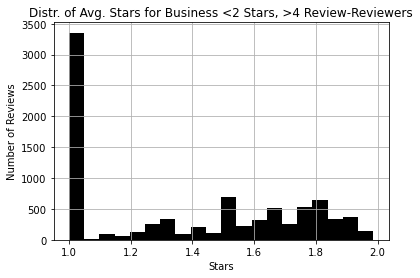

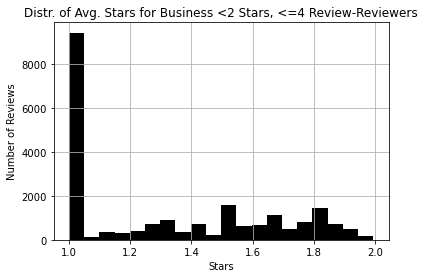

Average Star Rating for Business <2 Stars, >4 Review-Reviewers: 1.3779619348901415
Average Star Rating for Business <2 Stars, <=4 Review-Reviewers: 1.319864887964888

Std Dev Star Rating for Business <2 Stars, >4 Review-Reviewers: 0.3452634909782543
Std Dev Star Rating for Business <2 Stars, <=4 Review-Reviewers: 0.3298858289822562

Number of Reviews with Star Rating for Business <2 Stars, >4 Review-Reviewers: 8693
Number of Reviews with Star Rating for Business <2 Stars, <=4 Review-Reviewers: 21645

t-Statistic -13.420274868389475
p-value: 0.0


In [5]:
# Query 7: Business Star Rating for Businesses Less than 2 Stars, >4 Review-Reviewers
# -----------------------------------------------------------------------------------
# This is accomplished by getting the count of reviews by each user from the review 
# table and the review table is rejoined to this and the buiness table is rejoined to 
# this which temporarily gives the real stars, business ID, city, restaurant status 
# and name of the business. This allows for the "true" stars by business to be pulled 
# from this so now there are all the business "true" star ratings for only users
# with more than 4 reviews and businesses with less than 2 stars.

query7 = ("""select round(sum(zone3.real_stars)/count(zone3.real_stars), 6) true_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id
having review_count > 4) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business) as zone3
group by business_id
having true_stars < 2""")

cursor.execute(query7)

user7 = cursor.fetchall()
df7 = pd.DataFrame.from_dict(user7)
df7 = df7.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
#print("Average Star Rating for Business <2 Stars, >4 Review-Reviewers: {}".format(sum(df7['Stars'])/len(df7['Stars'])))
df7['Stars'].hist(bins=20, color='black')
plt.xlabel("Stars", color="black")
plt.ylabel("Number of Reviews", color='black')
plt.title("Distr. of Avg. Stars for Business <2 Stars, >4 Review-Reviewers", color='black')
plt.show()

# Query 7b: Business Star Rating for Businesses Less than 2 Stars, <=4 Review-Reviewers
# --------------------------------------------------------------------------------------
# This is accomplished by getting the count of reviews by each user from the review 
# table and the review table is rejoined to this and the buiness table is rejoined to 
# this which temporarily gives the real stars, business ID, city, restaurant status 
# and name of the business. This allows for the "true" stars by business to be pulled 
# from this so now there are all the business "true" star ratings for only users
# with 4 or less reviews and businesses with less than 2 stars.

query7b = ("""select round(sum(zone3.real_stars)/count(zone3.real_stars), 6) true_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id
having review_count <= 4) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business) as zone3
group by business_id
having true_stars < 2""")

cursor.execute(query7b)

user7b = cursor.fetchall()
df7b = pd.DataFrame.from_dict(user7b)
df7b = df7b.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
#print("Average Star Rating for All Nashville Restaurants: {}".format(sum(df7b['Stars'])/len(df7b['Stars'])))
df7b['Stars'].hist(bins=20, color='black')
plt.xlabel("Stars", color="black")
plt.ylabel("Number of Reviews", color='black')
plt.title("Distr. of Avg. Stars for Business <2 Stars, <=4 Review-Reviewers", color='black')
plt.show()

list_4plus = []
list_4minus = []


for i in df7['Stars']:
    list_4plus.append(float(i))

for j in df7b['Stars']:
    list_4minus.append(float(j))

avg_stars_4plus = np.average(list_4plus)
avg_stars_4minus = np.average(list_4minus)
print("Average Star Rating for Business <2 Stars, >4 Review-Reviewers: {}".format(avg_stars_4plus))
print("Average Star Rating for Business <2 Stars, <=4 Review-Reviewers: {}".format(avg_stars_4minus))
print()

std_dev_4plus = np.std(list_4plus)
std_dev_4minus = np.std(list_4minus)
print("Std Dev Star Rating for Business <2 Stars, >4 Review-Reviewers: {}".format(std_dev_4plus))
print("Std Dev Star Rating for Business <2 Stars, <=4 Review-Reviewers: {}".format(std_dev_4minus))
print()

n_dev_4plus = len(list_4plus)
n_dev_4minus = len(list_4minus)
print("Number of Reviews with Star Rating for Business <2 Stars, >4 Review-Reviewers: {}".format(n_dev_4plus))
print("Number of Reviews with Star Rating for Business <2 Stars, <=4 Review-Reviewers: {}".format(n_dev_4minus))
print()

t_stat_num = avg_stars_4minus - avg_stars_4plus
t_stat_den = math.sqrt(((std_dev_4minus**2)/n_dev_4minus)+((std_dev_4plus**2)/n_dev_4plus))
t_stat = t_stat_num/t_stat_den
print("t-Statistic {}".format(t_stat))

deg_freedom = n_dev_4plus + n_dev_4minus - 2

p_value = 1-t.cdf(abs((t_stat)), deg_freedom)
print("p-value: {}".format(p_value))

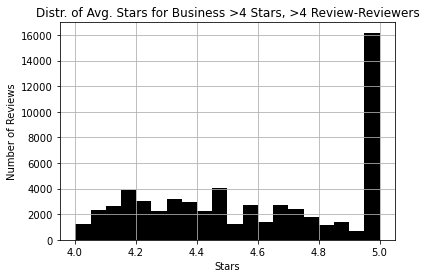

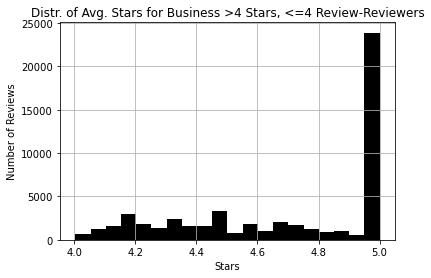

Average Star Rating for Business >4 Stars, >4 Review-Reviewers: 4.585659709505857
Average Star Rating for Business >4 Stars, <=4 Review-Reviewers: 4.694921360366252

Std Dev Star Rating for Business >4 Stars, >4 Review-Reviewers: 0.3270912902642512
Std Dev Star Rating for Business >4 Stars, <=4 Review-Reviewers: 0.32677729225068813

Number of Reviews with Star Rating for Business >4 Stars, >4 Review-Reviewers: 59416
Number of Reviews with Star Rating for Business >4 Stars, <=4 Review-Reviewers: 53515

t-statistic: 56.079097325893834
p-value: 0.0


In [4]:
# Query 8: Business Star Rating for Businesses More than 4 Stars, >4 Review-Reviewers
# -----------------------------------------------------------------------------------
# This is accomplished by getting the count of reviews by each user from the review 
# table and the review table is rejoined to this and the buiness table is rejoined to 
# this which temporarily gives the real stars, business ID, city, restaurant status 
# and name of the business. This allows for the "true" stars by business to be pulled 
# from this so now there are all the business "true" star ratings for only users
# with 4 or more reviews and businesses with more than 4 Stars.

query8 = ("""select round(sum(zone3.real_stars)/count(zone3.real_stars), 6) true_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id
having review_count > 4) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business) as zone3
group by business_id
having true_stars > 4""")

cursor.execute(query8)

user8 = cursor.fetchall()
df8 = pd.DataFrame.from_dict(user8)
df8 = df8.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
#print("Average Star Rating for Business >4 Stars, >4 Review-Reviewers: {}".format(sum(df8['Stars'])/len(df8['Stars'])))
df8['Stars'].hist(bins=20, color='black')
plt.xlabel("Stars", color="black")
plt.ylabel("Number of Reviews", color='black')
plt.title("Distr. of Avg. Stars for Business >4 Stars, >4 Review-Reviewers", color='black')
plt.show()

# Query 8b: Business Star Rating for Businesses More Than 4 Stars, <=4 Review-Reviewers
# --------------------------------------------------------------------------------------
# This is accomplished by getting the count of reviews by each user from the review 
# table and the review table is rejoined to this and the buiness table is rejoined to 
# this which temporarily gives the real stars, business ID, city, restaurant status 
# and name of the business. This allows for the "true" stars by business to be pulled 
# from this so now there are all the business "true" star ratings for only reviewers
# with 4 or more reviews.

query8b = ("""select round(sum(zone3.real_stars)/count(zone3.real_stars), 6) true_stars, zone3.business_id, zone3.name from 
(select zone2.real_stars, zone2.business, business_id, city, restaurant, name from business
inner join
(select business_id business, stars real_stars, user_id, user from review
inner join
(select count(review_id) review_count, user_id user, business_id b from review
group by user_id
having review_count <= 4) as zone1
on review.user_id=zone1.user
order by user_id) as zone2
on business.business_id=zone2.business) as zone3
group by business_id
having true_stars > 4""")

cursor.execute(query8b)

user8b = cursor.fetchall()
df8b = pd.DataFrame.from_dict(user8b)
df8b = df8b.rename({0: 'Stars', 1: 'Business_ID', 2: 'Business_Name'}, axis=1)
#print("Average Star Rating for All Nashville Restaurants: {}".format(sum(df8b['Stars'])/len(df8b['Stars'])))
df8b['Stars'].hist(bins=20, color='black')
plt.xlabel("Stars", color="black")
plt.ylabel("Number of Reviews", color='black')
plt.title("Distr. of Avg. Stars for Business >4 Stars, <=4 Review-Reviewers", color='black')
plt.show()

list_4plus = []
list_4minus = []


for i in df8['Stars']:
    list_4plus.append(float(i))

for j in df8b['Stars']:
    list_4minus.append(float(j))

avg_stars_4plus = np.average(list_4plus)
avg_stars_4minus = np.average(list_4minus)
print("Average Star Rating for Business >4 Stars, >4 Review-Reviewers: {}".format(avg_stars_4plus))
print("Average Star Rating for Business >4 Stars, <=4 Review-Reviewers: {}".format(avg_stars_4minus))
print()

std_dev_4plus = np.std(list_4plus)
std_dev_4minus = np.std(list_4minus)
print("Std Dev Star Rating for Business >4 Stars, >4 Review-Reviewers: {}".format(std_dev_4plus))
print("Std Dev Star Rating for Business >4 Stars, <=4 Review-Reviewers: {}".format(std_dev_4minus))
print()

n_dev_4plus = len(list_4plus)
n_dev_4minus = len(list_4minus)
print("Number of Reviews with Star Rating for Business >4 Stars, >4 Review-Reviewers: {}".format(n_dev_4plus))
print("Number of Reviews with Star Rating for Business >4 Stars, <=4 Review-Reviewers: {}".format(n_dev_4minus))
print()

t_stat_num = avg_stars_4minus - avg_stars_4plus
t_stat_den = math.sqrt(((std_dev_4minus**2)/n_dev_4minus)+((std_dev_4plus**2)/n_dev_4plus))
t_stat = t_stat_num/t_stat_den
print("t-statistic: {}".format(t_stat))

deg_freedom = n_dev_4plus + n_dev_4minus - 2

p_value = 1-t.cdf(abs((t_stat)), deg_freedom)
print("p-value: {}".format(p_value))